# Humza Khalid, 12-3-2025

#This project pulls data from a Car Dealership Csv File  and preforms data analysis amongst the questions given, to help dealership management  use these insights to improve sales performance, reduce inventory costs, and increase profit margins.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [25]:
sns.set_theme(style="whitegrid")

In [26]:
dataframe = "auto_inventory_cleaned.csv"

In [27]:
df = pd.read_csv(dataframe)

# 1)Does drive type (front-wheel, all-wheel, rear-wheel) influence average vehicle price?

In [28]:
drive_price_analysis = df.groupby('drive')['price'].mean().sort_values(ascending=False).reset_index()
print("\nAverage Price by Drive Type:")
print(drive_price_analysis)


Average Price by Drive Type:
                   drive         price
0          4 wheel drive  38304.584416
1   2 wheel drive - rear  36128.846154
2        All wheel drive  34915.304721
3  2 wheel drive - front  25047.246032


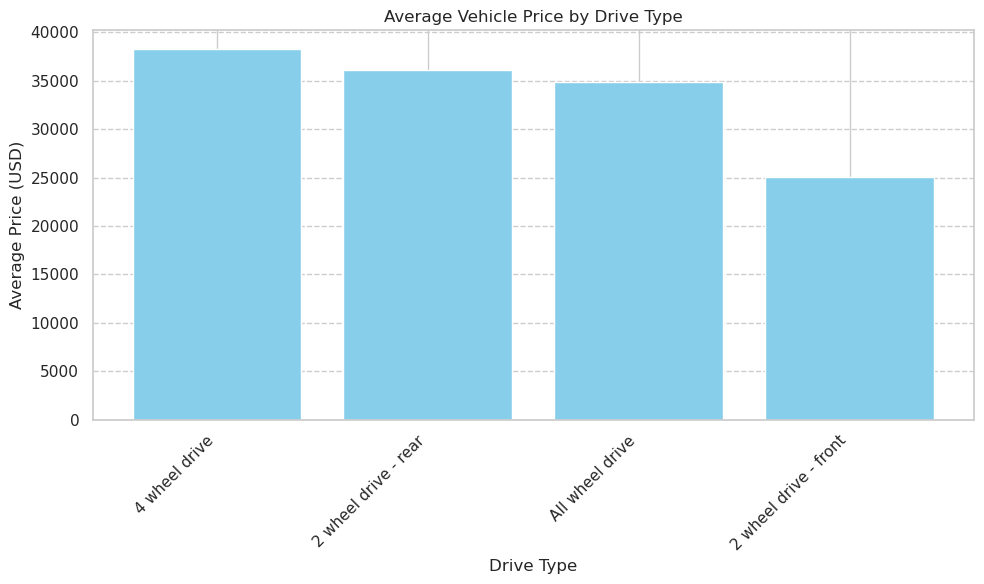

In [29]:
#Bar chart
plt.figure(figsize=(10, 6))
plt.bar(drive_price_analysis['drive'], drive_price_analysis['price'], color='skyblue')
plt.title('Average Vehicle Price by Drive Type')
plt.xlabel('Drive Type')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.savefig('avg_vehicle_price_by_drive_type.png')

# This Chart indicates that vehicles with 4-wheel drive have the highest average price, while those with front-wheel drive have the lowest average price.Overall showing the  drive system is a key factor in determining a vehicle's market value, mainly due to differences in producing  cost, mechanical complexity, and the type of vehicle model  it is.

# 2)Are there notable pricing differences between “Used” and “Certified/New” vehicles?

In [30]:
print("\nCondition vs. Price")
condition_price_analysis = df.groupby('condition')['price'].mean().sort_values(ascending=False).reset_index()
print("\nAverage Price by Vehicle Condition:")
print(condition_price_analysis)


Condition vs. Price

Average Price by Vehicle Condition:
  condition         price
0       New  33913.810811
1      Used  31955.651515


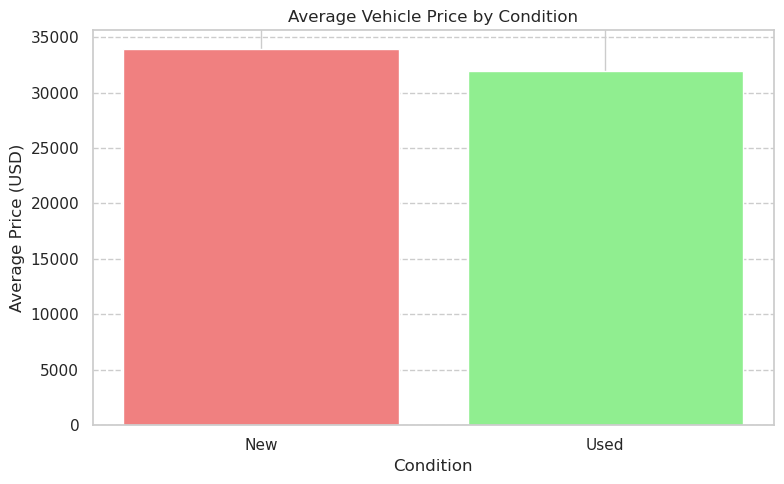

In [31]:
#Bar chart
plt.figure(figsize=(8, 5))
plt.bar(condition_price_analysis['condition'], condition_price_analysis['price'], color=['lightcoral', 'lightgreen'])
plt.title('Average Vehicle Price by Condition')
plt.xlabel('Condition')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.savefig('avg_price_by_condition_bar.png')

# This chart indicates that there is a  noticeable difference in average price, with new vehicles being slightly more expensive than used vehicles with common factors such as the year,mileage,drive type, as well as model of the car.

# 3)How does vehicle price vary by make, model, and year?

In [38]:

df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['mileage'] = pd.to_numeric(df['mileage'], errors='coerce')
df.dropna(subset=['price', 'mileage', 'make', 'model', 'year', 'dealer'], inplace=True)
top_make_models = df.groupby(['make', 'model']).size().nlargest(5).index.tolist()
df_filtered = df[df.set_index(['make', 'model']).index.isin(top_make_models)].copy()
price_variation = df_filtered.groupby(['make', 'model', 'year', 'dealer'])['price'].mean().reset_index()
price_variation.rename(columns={'price': 'Average_Price'}, inplace=True)


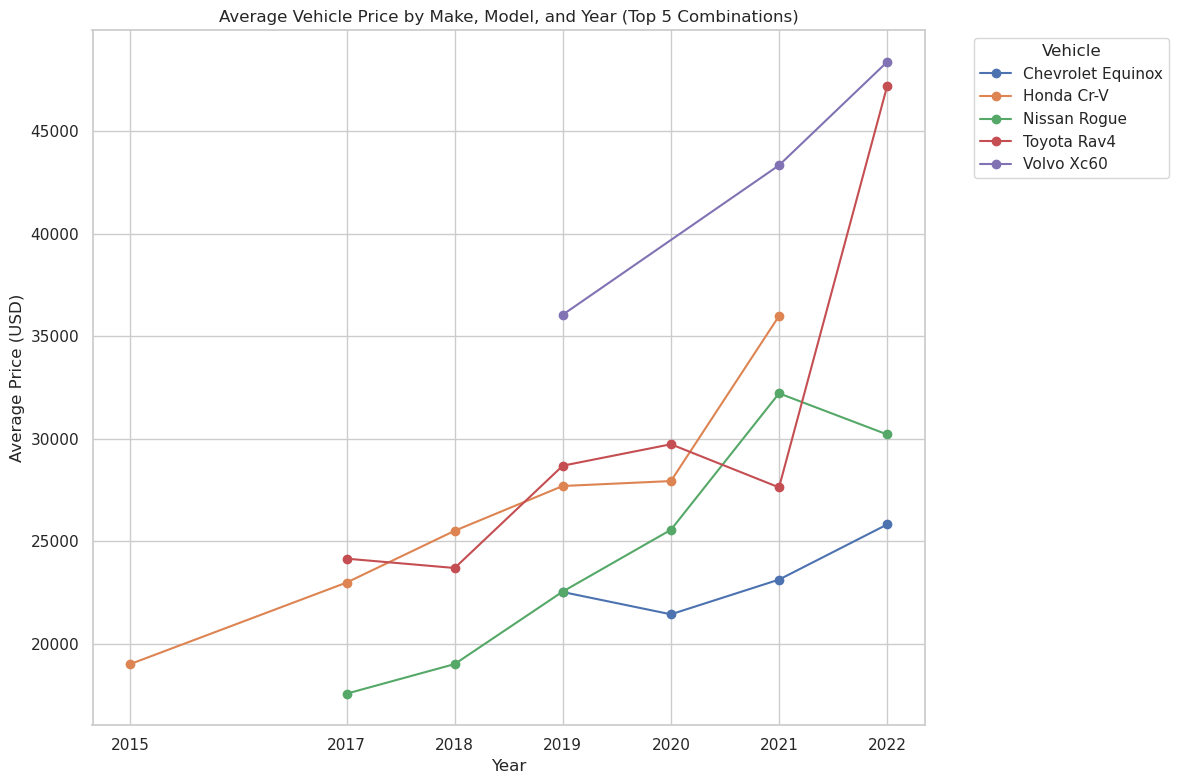

In [39]:

#Matplot
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))


for (make, model), group in price_variation.groupby(['make', 'model']):
    label = f'{make} {model}'
    group = group.sort_values('year')
    plt.plot(group['year'], group['Average_Price'], marker='o', label=label)

plt.title('Average Vehicle Price by Make, Model, and Year (Top 5 Combinations)')
plt.xlabel('Year')
plt.ylabel('Average Price (USD)')
plt.xticks(price_variation['year'].unique())
plt.legend(title='Vehicle', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig('average_price_by_make_model_year.png')
plt.show()

# This Chart indicates that most  cars that are  newer in model, prices tends to be higher but as the  cars start to get older the price starts to depreciate. Some models of cars  such as the Nissan Rogue tend  to not be in as much of demand therefore the price of the newer model is lower than the older model as shown in the chart.

# 4)What is the relationship between mileage and price — do higher-mileage cars consistently sell for less?

In [41]:
correlation = df['mileage'].corr(df['price'])
print(f"The Pearson correlation coefficient between mileage and price is: {correlation:.4f}")

The Pearson correlation coefficient between mileage and price is: -0.2241


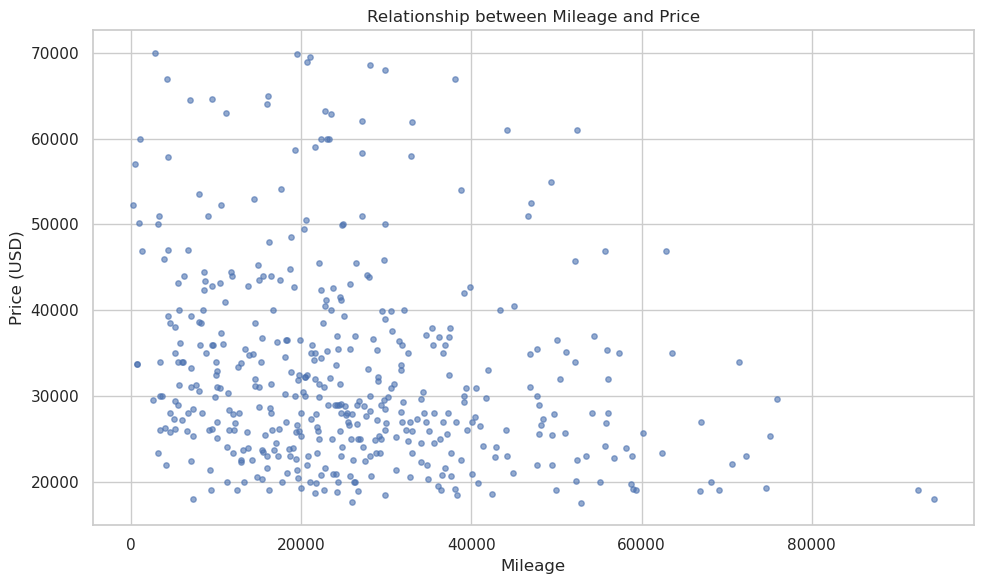

In [44]:
#Matplot
plt.figure(figsize=(10, 6))
plt.scatter(df['mileage'], df['price'], alpha=0.6, s=15)

plt.title('Relationship between Mileage and Price')
plt.xlabel('Mileage')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()



# This chart indicates that most cars are in  the lower mileage range although some may have a higher price since the car is newer.  Some cars are in the low price range due to massive amount of miles reported on the vehicle, while most of them are priced in the lower price range even though  they have low miles is due to the fact that the  vehicle has  a bad condition report making the overall value depreciate significantly.